In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../input/train.csv", parse_dates=["order_date"])
pd.set_option('display.max_row', 100)

In [3]:
describe_array = data.description.unique()
len(describe_array)

5297

# 개수가 78만개

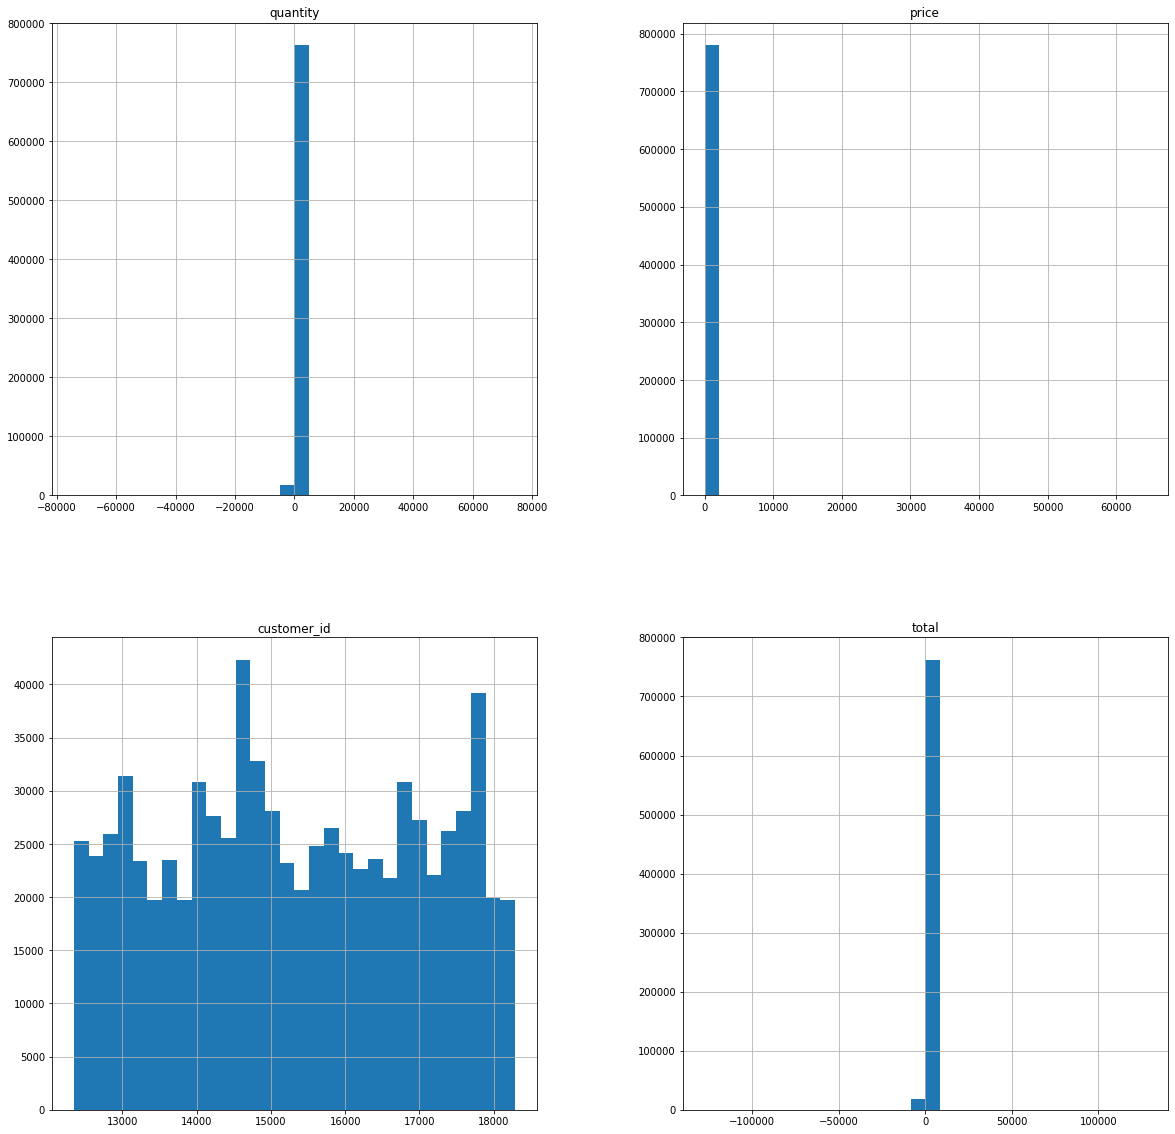

In [35]:
data.hist(bins=30, figsize=(20,20))
plt.show()

## order_id 개수로 주문수를 count한다. (환불도 카운트 된다) 

In [189]:
customer_id = data.customer_id.unique()
order_count = []
for id in customer_id:
    num = len(data[data.customer_id.isin([id])].order_id.unique())
    order_count.append(num)
len(order_count)

5914

In [164]:
order_count.count(0)

0

In [193]:
data[data.total == 0].head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
3691,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126,United Kingdom,0.0
4814,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658,United Kingdom,0.0
12801,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231,United Kingdom,0.0
14355,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108,United Kingdom,0.0
14356,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108,United Kingdom,0.0


In [170]:
total = data.groupby('customer_id').sum().reset_index().drop(['quantity', 'price'], axis=1)
total['order_count'] = order_count
total.describe()

,customer_id,total,order_count
count,5914.000000,5914.000000,5914.000000
mean,15319.245012,4449.596866,7.432364
std,1714.002438,22175.661770,15.720841
min,12346.000000,-41433.298500,1.000000
25%,13837.250000,523.194375,1.000000
50%,15319.500000,1340.889000,3.000000
75%,16804.750000,3484.284375,8.000000
max,18287.000000,922176.865500,500.000000


In [172]:
total[total.order_count == 0]

,customer_id,total,order_count


In [173]:
eps = 0.000001
total['mean'] = (total.total+eps)/total.order_count

In [188]:
print(len(total[total['mean'] >= 300]))
print(len(total[total['mean'] < 300]))
print(len(total[total['mean'] < 0]))

3230
2684
81


[12000, 19000, 0, 500]

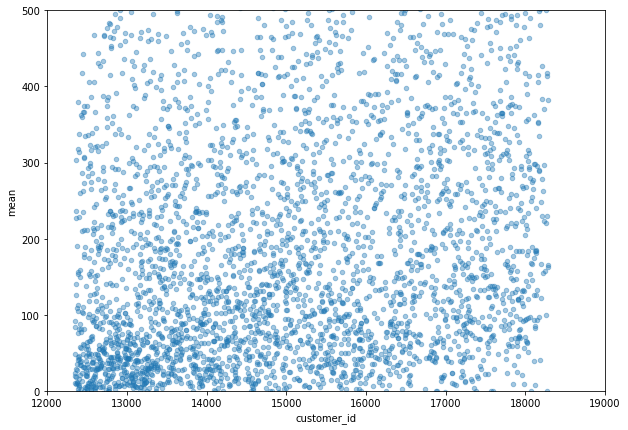

In [184]:
total.plot(kind="scatter", x="customer_id", y="mean", alpha=0.4, figsize=(10,7),
            cmap=plt.get_cmap("jet"))
plt.axis([12000, 19000, 0, 500]) 

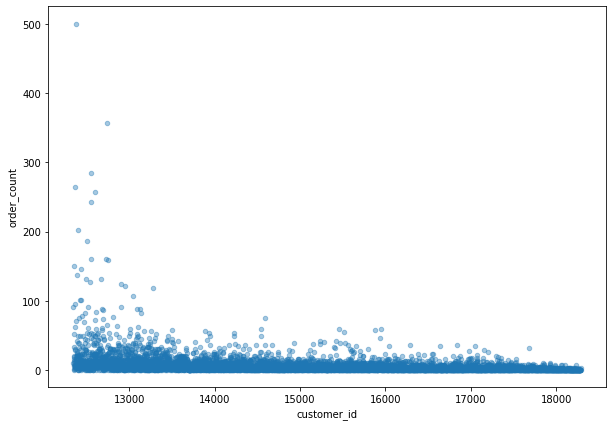

In [194]:
total.plot(kind="scatter", x="customer_id", y="order_count", alpha=0.4, figsize=(10,7),
            cmap=plt.get_cmap("jet"))
# plt.axis([12000, 19000, 0, 500]) 

# 국가

In [192]:
len(data.country.unique())

41

In [4]:
data[data.total == 0]

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
3691,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126,United Kingdom,0.0
4814,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658,United Kingdom,0.0
12801,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231,United Kingdom,0.0
14355,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108,United Kingdom,0.0
14356,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108,United Kingdom,0.0
24178,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070,United Kingdom,0.0
29115,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071,United Kingdom,0.0
33103,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258,United Kingdom,0.0
34296,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417,Belgium,0.0
39093,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858,United Kingdom,0.0
